In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [2]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [3]:
df=df[df['location']=='Colombia']
df=df[['date','new_cases']]

In [4]:
df

,date,new_cases
9702,2020-03-05,NaN
9703,2020-03-06,NaN
9704,2020-03-07,1.0
9705,2020-03-08,NaN
9706,2020-03-09,NaN
...,...,...
9920,2020-10-09,8496.0
9921,2020-10-10,8121.0
9922,2020-10-11,8447.0
9923,2020-10-12,8569.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


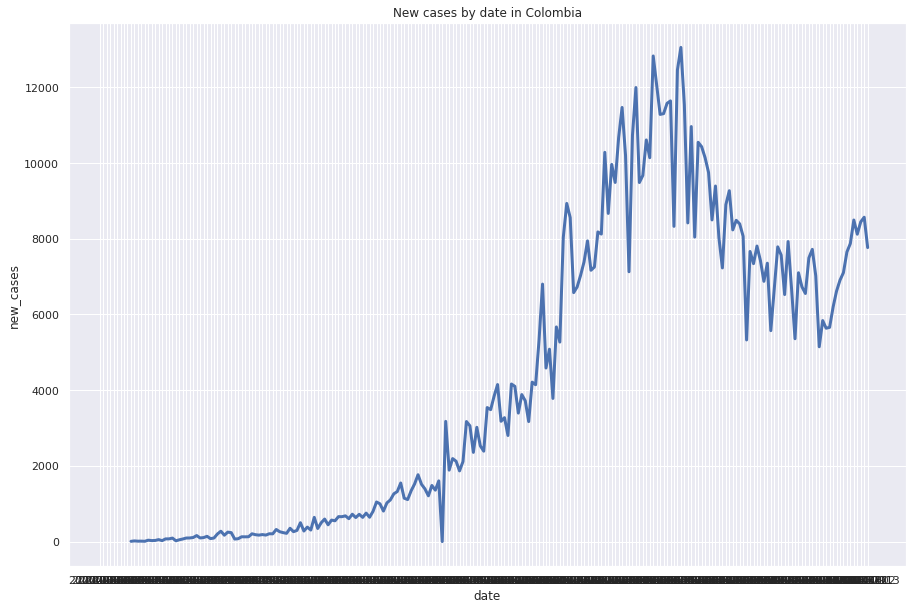

In [5]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Colombia')
plt.show()


#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [6]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [7]:
case_series=case_series.fillna(0)
case_series

,new_cases
9702,0.0
9703,0.0
9704,1.0
9705,0.0
9706,0.0
...,...
9920,8496.0
9921,8121.0
9922,8447.0
9923,8569.0


In [8]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
timestep=6
X_case, y_case = create_dataset(case_series, timestep)
#X_death,y_death=create_dataset(death_series,timestep)

In [10]:
train_size=int(len(case_series)*0.95)

In [11]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [12]:

n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

x_case_test=x_case_valid.reshape((x_case_valid.shape[0], x_case_valid.shape[1], n_features))




## **Model preperation:**

In [13]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
#model.add(Bidirectional(LSTM(20,activation='relu')))
#model.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(30,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=250, verbose=2,validation_data=(x_case_test,y_case_valid))

Epoch 1/250
7/7 - 0s - loss: 18416534.0000 - val_loss: 34104212.0000
Epoch 2/250
7/7 - 0s - loss: 13247911.0000 - val_loss: 23126922.0000
Epoch 3/250
7/7 - 0s - loss: 8504493.0000 - val_loss: 12080250.0000
Epoch 4/250
7/7 - 0s - loss: 4561792.0000 - val_loss: 3307162.7500
Epoch 5/250
7/7 - 0s - loss: 2016225.2500 - val_loss: 244591.5938
Epoch 6/250
7/7 - 0s - loss: 1971458.7500 - val_loss: 181899.1562
Epoch 7/250
7/7 - 0s - loss: 1401104.5000 - val_loss: 1146652.7500
Epoch 8/250
7/7 - 0s - loss: 963502.5000 - val_loss: 2143035.5000
Epoch 9/250
7/7 - 0s - loss: 957397.6875 - val_loss: 1471648.5000
Epoch 10/250
7/7 - 0s - loss: 898218.0625 - val_loss: 1230249.6250
Epoch 11/250
7/7 - 0s - loss: 937719.1875 - val_loss: 485235.9062
Epoch 12/250
7/7 - 0s - loss: 1030195.9375 - val_loss: 271710.1875
Epoch 13/250
7/7 - 0s - loss: 1029684.0000 - val_loss: 3089088.7500
Epoch 14/250
7/7 - 0s - loss: 1118200.7500 - val_loss: 2810229.2500
Epoch 15/250
7/7 - 0s - loss: 1203906.1250 - val_loss: 21904

# **Check validation data:**

In [14]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+6-15)])

x_input=numpy.array(x_input)



In [15]:
x_input

array([7787., 7568., 6526., 7927., 6678., 5359.], dtype=float32)

In [16]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>6):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[7123.428]
1 day input [7568.    6526.    7927.    6678.    5359.    7123.428]
[7568.    6526.    7927.    6678.    5359.    7123.428]
[[[7568.   ]
  [6526.   ]
  [7927.   ]
  [6678.   ]
  [5359.   ]
  [7123.428]]]
1 day output [[6849.436]]
2 day input [6526.    7927.    6678.    5359.    7123.428 6849.436]
[6526.    7927.    6678.    5359.    7123.428 6849.436]
[[[6526.   ]
  [7927.   ]
  [6678.   ]
  [5359.   ]
  [7123.428]
  [6849.436]]]
2 day output [[6894.1323]]
3 day input [7927.     6678.     5359.     7123.428  6849.436  6894.1323]
[7927.     6678.     5359.     7123.428  6849.436  6894.1323]
[[[7927.    ]
  [6678.    ]
  [5359.    ]
  [7123.428 ]
  [6849.436 ]
  [6894.1323]]]
3 day output [[6636.9307]]
4 day input [6678.     5359.     7123.428  6849.436  6894.1323 6636.9307]
[6678.     5359.     7123.428  6849.436  6894.1323 6636.9307]
[[[6678.    ]
  [5359.    ]
  [7123.428 ]
  [6849.436 ]
  [6894.1323]
  [6636.9307]]]
4 day output [[6633.8726]]
5 day input [5359.     7123.42

In [17]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [18]:
lst_output=numpy.array(lst_output)
lst_output

array([7123.428 , 6849.436 , 6894.1323, 6636.9307, 6633.8726, 6608.2964,
       6885.4194, 6849.7095, 6852.693 , 6828.187 , 6847.816 , 6886.4033],
      dtype=float32)

No handles with labels found to put in legend.


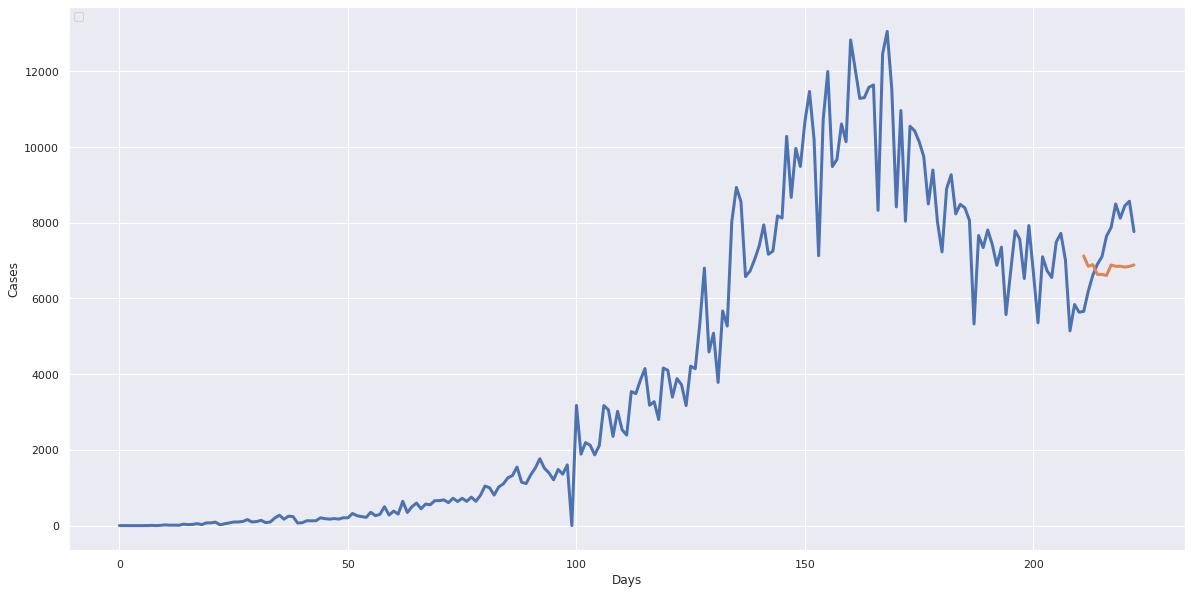

In [19]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [20]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [21]:

x_input

array([7875., 8496., 8121., 8447., 8569., 7767.], dtype=float32)

In [22]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>6):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[8299.082]
1 day input [8496.    8121.    8447.    8569.    7767.    8299.082]
[8496.    8121.    8447.    8569.    7767.    8299.082]
[[[8496.   ]
  [8121.   ]
  [8447.   ]
  [8569.   ]
  [7767.   ]
  [8299.082]]]
1 day output [[8369.26]]
2 day input [8121.    8447.    8569.    7767.    8299.082 8369.26 ]
[8121.    8447.    8569.    7767.    8299.082 8369.26 ]
[[[8121.   ]
  [8447.   ]
  [8569.   ]
  [7767.   ]
  [8299.082]
  [8369.26 ]]]
2 day output [[8361.277]]
3 day input [8447.    8569.    7767.    8299.082 8369.26  8361.277]
[8447.    8569.    7767.    8299.082 8369.26  8361.277]
[[[8447.   ]
  [8569.   ]
  [7767.   ]
  [8299.082]
  [8369.26 ]
  [8361.277]]]
3 day output [[8440.596]]
4 day input [8569.    7767.    8299.082 8369.26  8361.277 8440.596]
[8569.    7767.    8299.082 8369.26  8361.277 8440.596]
[[[8569.   ]
  [7767.   ]
  [8299.082]
  [8369.26 ]
  [8361.277]
  [8440.596]]]
4 day output [[8418.045]]
5 day input [7767.    8299.082 8369.26  8361.277 8440.596 8418.045]
[7

In [23]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


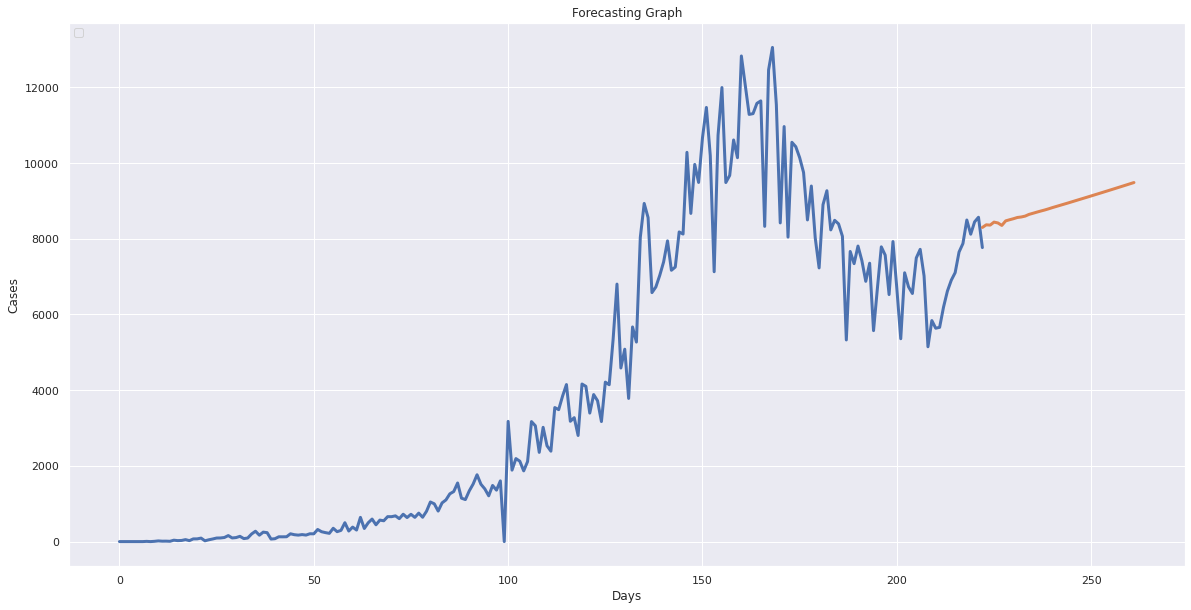

In [25]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()